In [1]:
import numpy as np
from astropy.io import fits
from astropy import units as u
import radio_beam
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt

In [2]:
path = '/export/data1/brodriguez/'

# CO(2-1) data cube for UGC12250

In [4]:
cube = SpectralCube.read(path+'UGC12250_7m_co21_pbcor.fits')

In [5]:
cube

SpectralCube with shape=(197, 120, 120) and unit=Jy / beam:
 n_x:    120  type_x: RA---SIN  unit_x: deg    range:   343.874350 deg:  343.925200 deg
 n_y:    120  type_y: DEC--SIN  unit_y: deg    range:    12.765276 deg:   12.814860 deg
 n_s:    197  type_s: VRAD      unit_s: m / s  range:  6617812.200 m / s: 7613756.253 m / s

In [6]:
cube.meta

{'BUNIT': 'beam-1 Jy',
 'beam': Beam: BMAJ=9.4445867644524 arcsec BMIN=5.4209408945904 arcsec BPA=-35.71292199102 deg}

In [7]:
cube.beam

Beam: BMAJ=9.4445867644524 arcsec BMIN=5.4209408945904 arcsec BPA=-35.71292199102 deg

In [8]:
cube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD'  
CRVAL : 343.8995616667  12.79027758333  7613756.253316  
CRPIX : 61.0  61.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0004166666666667  0.0004166666666667  -5081.347213086  
NAXIS : 120  120  197

In [9]:
cube.spectral_axis

<Quantity [7613756.253316  , 7608674.90610291, 7603593.55888983,
           7598512.21167674, 7593430.86446366, 7588349.51725057,
           7583268.17003748, 7578186.8228244 , 7573105.47561131,
           7568024.12839823, 7562942.78118514, 7557861.43397205,
           7552780.08675897, 7547698.73954588, 7542617.3923328 ,
           7537536.04511971, 7532454.69790662, 7527373.35069354,
           7522292.00348045, 7517210.65626737, 7512129.30905428,
           7507047.96184119, 7501966.61462811, 7496885.26741502,
           7491803.92020194, 7486722.57298885, 7481641.22577576,
           7476559.87856268, 7471478.53134959, 7466397.18413651,
           7461315.83692342, 7456234.48971033, 7451153.14249725,
           7446071.79528416, 7440990.44807108, 7435909.10085799,
           7430827.7536449 , 7425746.40643182, 7420665.05921873,
           7415583.71200565, 7410502.36479256, 7405421.01757947,
           7400339.67036639, 7395258.3231533 , 7390176.97594022,
           7385095.628727

In [10]:
velo, dec, ra = cube.world[0,:,:]

## Plotting a frame at a given velocity (or frequency)

INFO: Auto-setting vmin to -1.158e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.078e-01 [aplpy.core]


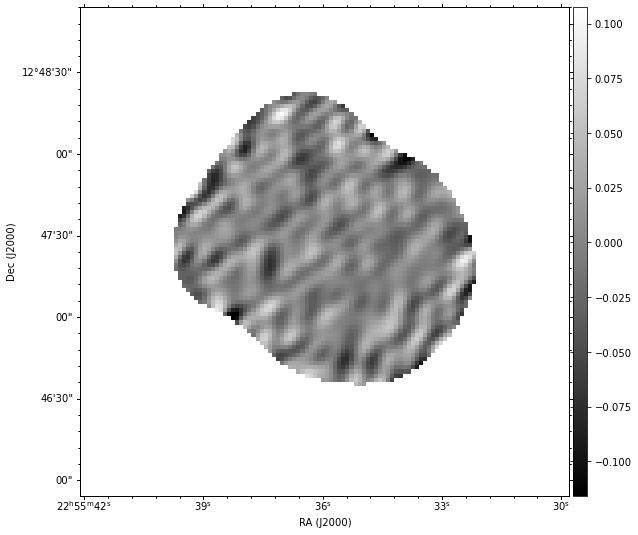

In [11]:
cube[180,:,:].quicklook()

## Plotting a spectrum at a given pixel

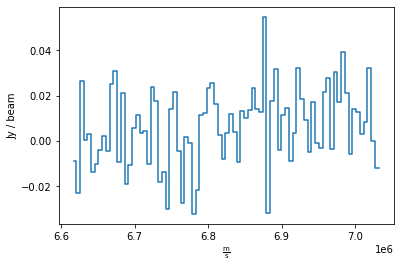

In [12]:
cube[:,60,60].quicklook()

## Extracting the minimal valid subcube

In [21]:
np.count_nonzero(np.isfinite(cube[:,60,60]))

82

In [13]:
subcube = cube.minimal_subcube()

In [14]:
subcube

SpectralCube with shape=(82, 72, 74) and unit=Jy / beam:
 n_x:     74  type_x: RA---SIN  unit_x: deg    range:   343.884179 deg:  343.915372 deg
 n_y:     72  type_y: DEC--SIN  unit_y: deg    range:    12.776527 deg:   12.806110 deg
 n_s:     82  type_s: VRAD      unit_s: m / s  range:  6617812.200 m / s: 7029401.324 m / s

In [77]:
subcube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD'  
CRVAL : 343.8995616667  12.79027758333  7613756.253316  
CRPIX : 38.0  34.0  -114.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0004166666666667  0.0004166666666667  -5081.347213086  
NAXIS : 120  120  197

In [84]:
subcube.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3                                                  
NAXIS1  =                   74                                                  
NAXIS2  =                   72                                                  
NAXIS3  =                   82                                                  
BMAJ    = 0.002623496323459005                                                  
BMIN    = 0.002222222222222228                                                  
BPA     =   -35.71292199102001                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'UGC12250'                                                            
BUNIT   = 'beam-1 Jy'          / Brightness (pixel) unit                        
ALTRVAL =   2.246830823985E+

In [88]:
(subcube.header['CDELT2']*u.deg).to(u.arcsec)

<Quantity 1.5 arcsec>

## Computing and visualizing moments of different order

In [142]:
moment_0 = subcube.moment(order=0)
moment_1 = subcube.moment(order=1)
fwhm_map = subcube.linewidth_fwhm()

/usr/lib/python3/dist-packages/spectral_cube/_moments.py:168: RuntimeWarning: invalid value encountered in true_divide
  return (np.nansum(data * pix_cen, axis=axis) /


INFO: Auto-setting vmin to -7.305e+03 [aplpy.core]
INFO: Auto-setting vmax to  7.732e+03 [aplpy.core]


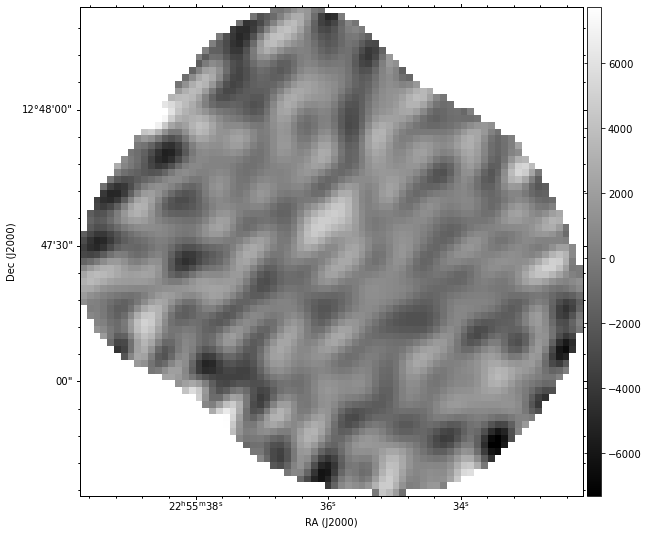

In [18]:
moment_0.quicklook()

INFO: Auto-setting vmin to -1.076e+07 [aplpy.core]
INFO: Auto-setting vmax to  1.645e+07 [aplpy.core]


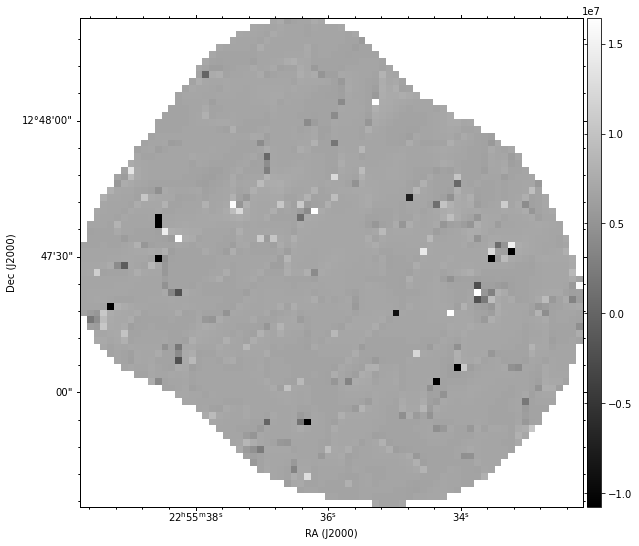

In [24]:
moment_1.quicklook()

INFO: Auto-setting vmin to -1.117e+05 [aplpy.core]
INFO: Auto-setting vmax to  1.240e+06 [aplpy.core]


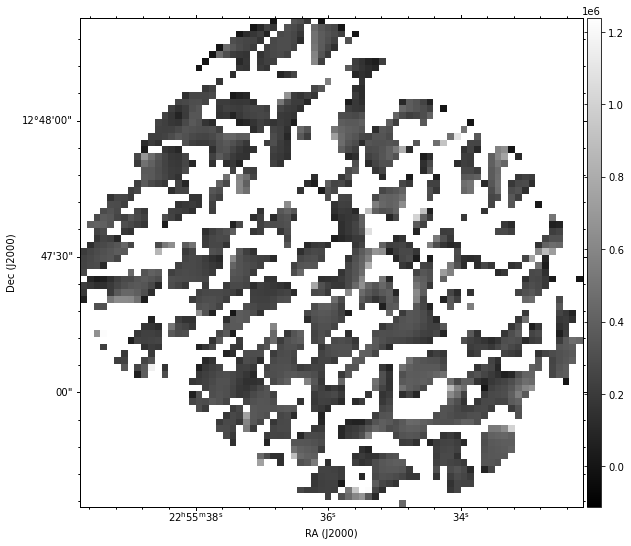

In [25]:
fwhm_map.quicklook()

## Masking the cube with a circular aperture

In [19]:
yy, xx = np.indices([9,9],dtype=float)
radius = ((yy-4)**2 + (xx-4)**2)**0.5
mask = radius <= 3
mask

array([[False, False, False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True,  True, False, False],
       [False, False,  True,  True,  True,  True,  True, False, False],
       [False,  True,  True,  True,  True,  True,  True,  True, False],
       [False, False,  True,  True,  True,  True,  True, False, False],
       [False, False,  True,  True,  True,  True,  True, False, False],
       [False, False, False, False,  True, False, False, False, False],
       [False, False, False, False, False, False, False, False, False]])

In [20]:
n_s, n_y, n_x = subcube.shape
yy, xx = np.indices([n_y,n_x],dtype=float)
radius = ((yy-int(n_y/2))**2 + (xx-int(n_x/2))**2)**0.5
mask = radius <= 10

INFO: Auto-setting vmin to -2.976e+03 [aplpy.core]
INFO: Auto-setting vmax to  5.551e+03 [aplpy.core]


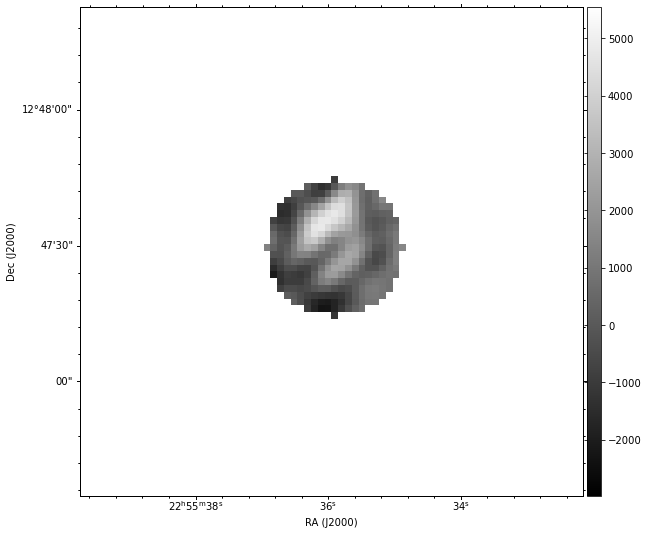

In [21]:
subcube.with_mask(mask).moment(order=0).quicklook()

## Finding the smallest common beam between two beams

In [15]:
subcube.beam

Beam: BMAJ=9.4445867644524 arcsec BMIN=5.4209408945904 arcsec BPA=-35.71292199102 deg

In [163]:
new_beam = radio_beam.Beam(major=8*u.arcsec, minor=8*u.arcsec, pa=0*u.deg)
new_beam

Beam: BMAJ=8.0 arcsec BMIN=8.0 arcsec BPA=0.0 deg

In [164]:
beam_list = radio_beam.Beams(beams=[subcube.beam,new_beam])
beam_list

<Beams [1.36355226e-09, 1.70448871e-09] sr>

In [165]:
common_beam = radio_beam.commonbeam.common_2beams(beam_list)
common_beam

Beam: BMAJ=9.444586764452417 arcsec BMIN=8.000000000000021 arcsec BPA=-35.71292199102001 deg

pixel scale: 1.50000000000012 arcsec


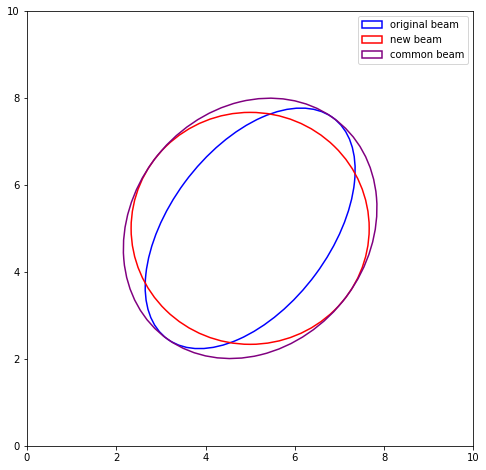

In [166]:
ycen_pix, xcen_pix = 5, 5
pixscale = (subcube.header['CDELT2']*u.deg).to(u.arcsec)
print('pixel scale:',pixscale)

ellipse_artist1 = subcube.beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
ellipse_artist2 = new_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
ellipse_artist3 = common_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)

fig, ax = plt.subplots(figsize=(8,8))
for ellipse, color, name in zip([ellipse_artist1,ellipse_artist2,ellipse_artist3],
                                ['blue','red','purple'],['original','new','common']):
    ellipse.set(fill=False,edgecolor=color,label=name+' beam',linewidth=1.5)
    ax.add_artist(ellipse)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.legend(loc='best')
plt.show()

## Convolving cube to the common beam

In [167]:
new_cube = subcube.convolve_to(common_beam)

INFO: Auto-setting vmin to -1.078e+04 [aplpy.core]
INFO: Auto-setting vmax to  1.141e+04 [aplpy.core]


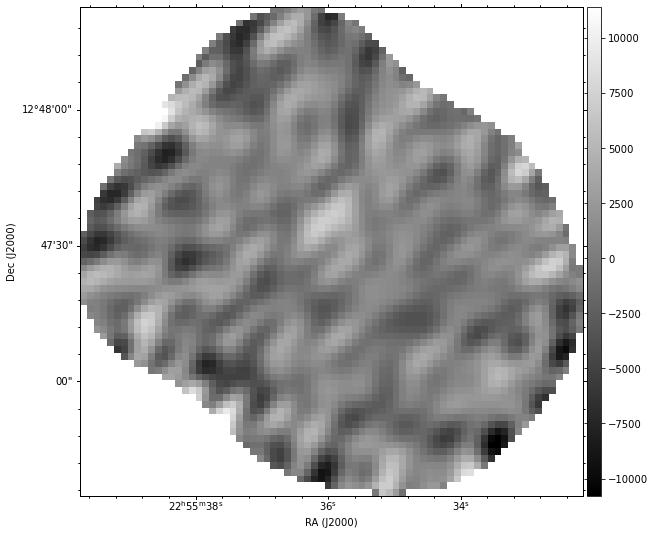

In [168]:
new_cube.moment(order=0).quicklook()

In [169]:
subcube.wcs.celestial

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 343.8995616667  12.79027758333  
CRPIX : 38.0  34.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004166666666667  0.0004166666666667  
NAXIS : 120  120

In [173]:
subcube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD'  
CRVAL : 343.8995616667  12.79027758333  7613756.253316  
CRPIX : 38.0  34.0  -114.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0004166666666667  0.0004166666666667  -5081.347213086  
NAXIS : 120  120  197

In [182]:
target_header

WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                19.25 / Pixel coordinate of reference point            
CRPIX2  =                17.25 / Pixel coordinate of reference point            
CDELT1  =  -0.0008333333333334 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0008333333333334 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---SIN'           / Right ascension, orthographic/synthesis project
CTYPE2  = 'DEC--SIN'           / Declination, orthographic/synthesis projection 
CRVAL1  =       343.8995616667 / [deg] Coordinate value at reference point      
CRVAL2  =       12.79027758333 / [deg] Coordinate value at reference point      
PV2_1   =                  0.0 / SIN projection parameter                       
PV2_2   =                  0

In [190]:
target_header = subcube.wcs[::2, ::2,:].to_header()
target_header['NAXIS1'] = subcube.shape[2] / 2
target_header['NAXIS2'] = subcube.shape[1] / 2
target_header['NAXIS3'] = subcube.shape[0]
#target_header['NAXIS'] = 3

downsampled_cube = subcube.reproject(target_header)

KeyError: "Keyword 'NAXIS' not found."

In [178]:
downsampled_cube

NameError: name 'downsampled_cube' is not defined

In [185]:
subcube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD'  
CRVAL : 343.8995616667  12.79027758333  7613756.253316  
CRPIX : 38.0  34.0  -114.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0004166666666667  0.0004166666666667  -5081.347213086  
NAXIS : 120  120  197

In [186]:
subcube.wcs.celestial

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 343.8995616667  12.79027758333  
CRPIX : 38.0  34.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0004166666666667  0.0004166666666667  
NAXIS : 120  120

<Projection [[nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             ...,
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan]] Jy m / (beam s)>